In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_excel("India_covid_Dailydata.xlsx")
#xls = pd.ExcelFile('India_covid_Dailydata.xlsx')
df1 = pd.read_excel('India_covid_Dailydata.xlsx', sheet_name="Maharashtra")
df2 = pd.read_excel('India_covid_Dailydata.xlsx', sheet_name="Karnataka")


In [3]:
df1.head()

,Date,Confirmed,Recovered,Deceased,New Confirmed,New Recovered,New Deceased,R/D rate,Active,Mumbai New,Mumbai New Death,Dharavi New,Dharavi New Death,Pune New,Pune New Death,Unnamed: 15
0,2020-04-15,2687.0,259.0,178.0,NaN,NaN,NaN,NaN,2250,183.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-16,2919.0,295.0,187.0,232.0,36.0,9.0,38.796680,`,117.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-17,3205.0,300.0,194.0,286.0,5.0,7.0,39.271255,2711,77.0,5.0,15.0,1.0,68.0,3.0,NaN
3,2020-04-18,3323.0,331.0,201.0,118.0,31.0,7.0,37.781955,2791,184.0,6.0,16.0,NaN,78.0,NaN,NaN
4,2020-04-19,3651.0,365.0,211.0,328.0,36.0,10.0,36.631944,3075,135.0,6.0,20.0,NaN,47.0,1.0,NaN


In [4]:
#df1 = df1.dropna()

In [5]:
df2.head()

,Date,Confirmed,Recovered,Deceased,New Confirmed,New Recovered,New Deceased,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2020-04-15,277.0,75.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-16,315.0,82.0,13.0,38.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-17,353.0,82.0,13.0,38.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-18,371.0,92.0,13.0,18.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-19,384.0,104.0,14.0,13.0,12.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\vijay\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 7200x720 with 0 Axes>

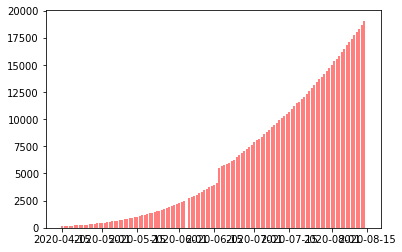

<Figure size 7200x720 with 0 Axes>

In [6]:

plt.bar(df1['Date'],df1['Deceased'], color='r', alpha=0.5, align="center")
plt.figure(figsize=(100,10))


<Figure size 7200x720 with 0 Axes>

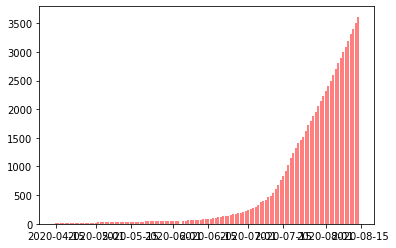

<Figure size 7200x720 with 0 Axes>

In [7]:
plt.bar(df2['Date'],df2['Deceased'], color='r', alpha=0.5, align="center")
plt.figure(figsize=(100,10))

In [11]:
df_kar = df2[['Date','Confirmed','Deceased']]
df_kar

,Date,Confirmed,Deceased
0,2020-04-15,277.0,11.0
1,2020-04-16,315.0,13.0
2,2020-04-17,353.0,13.0
3,2020-04-18,371.0,13.0
4,2020-04-19,384.0,14.0
...,...,...,...
134,2020-08-27,NaN,NaN
135,2020-08-28,NaN,NaN
136,2020-08-29,NaN,NaN
137,2020-08-30,NaN,NaN


In [12]:
df_kar = df_kar.dropna()
df_kar

,Date,Confirmed,Deceased
0,2020-04-15,277.0,11.0
1,2020-04-16,315.0,13.0
2,2020-04-17,353.0,13.0
3,2020-04-18,371.0,13.0
4,2020-04-19,384.0,14.0
...,...,...,...
117,2020-08-10,178087.0,3198.0
118,2020-08-11,182354.0,3312.0
119,2020-08-12,188611.0,3398.0
120,2020-08-13,196494.0,3510.0


In [13]:
import csv
import keras
import pandas
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, BatchNormalization, Conv1D, Conv2D, Flatten, MaxPooling1D
from keras import optimizers
import numpy as np
import tensorflow as tf
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [15]:
inputs = df_kar['Confirmed'].to_numpy()             
outputs = df_kar['Deceased'].to_numpy()
df_kar.tail(5)
days = []
count = 0
for elements in inputs:
  count += 1
  days.append(count)
df_kar['days'] = days

C:\Users\vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [16]:
df_kar

,Date,Confirmed,Deceased,days
0,2020-04-15,277.0,11.0,1
1,2020-04-16,315.0,13.0,2
2,2020-04-17,353.0,13.0,3
3,2020-04-18,371.0,13.0,4
4,2020-04-19,384.0,14.0,5
...,...,...,...,...
117,2020-08-10,178087.0,3198.0,117
118,2020-08-11,182354.0,3312.0,118
119,2020-08-12,188611.0,3398.0,119
120,2020-08-13,196494.0,3510.0,120


In [17]:
past = 7
s = (len(inputs) , past  * 2)
betterinputs = np.zeros(s)
betteroutputs = np.zeros(len(inputs))

for i in range(len(inputs) - past): # - 0
  temp = np.zeros(past * 2)
  temp[0 : past] = inputs[i : i+ past]
  temp[past:] = outputs[i : i + past] 
  betterinputs[i] = temp
  betteroutputs[i] = inputs[i+past] # + 0

In [19]:
betterinputs = betterinputs[0:len(df_kar) - past] # - 0
betteroutputs = betteroutputs[0:len(df_kar) - past]
days = days[0:len(df_kar) - past]

In [20]:
from matplotlib import pyplot as plt
split = int(0.8*len(betterinputs))
X_train, X_test, y_train, y_test = betterinputs[:split], betterinputs[split:], betteroutputs[:split], betteroutputs[split:]
X_train = np.expand_dims(X_train, axis=2)  
X_test = np.expand_dims(X_test, axis=2) 
days = days[split:]

2484.8239229770843


C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([0.96349939, 0.99817322])

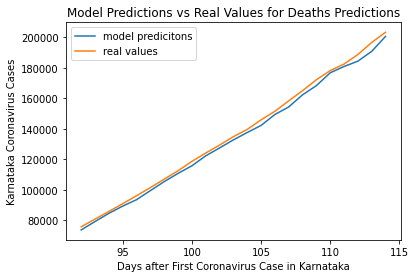

In [22]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
model = RidgeCV(cv = 2)
X_train, X_test, y_train, y_test = betterinputs[:split], betterinputs[split:], betteroutputs[:split], betteroutputs[split:]
model.fit(X_train, y_train)
print("{}".format(np.linalg.norm(model.predict(X_test) - y_test, 1)/len(y_test)))
predict = model.predict(X_test)
plt.title("Model Predictions vs Real Values for Deaths Predictions")
plt.ticklabel_format(style='plain')
plt.plot( days, predict, label = "model predicitons")
plt.plot( days, y_test,  label = "real values")
plt.xlabel("Days after First Coronavirus Case in Karnataka")
plt.ylabel("Karnataka Coronavirus Cases")
plt.legend()
cross_val_score(model, X_train, y_train, cv = 2)

In [23]:
model.score(X_test, y_test)

0.9949391539766409

In [30]:
from datetime import date
size = (2 , past  * 2)
finalInput = np.zeros(size)
temp = np.zeros(past * 2)
temp[:past] = inputs[-past:]
temp[past:] = outputs[-past:]
finalInput[0] = temp
finalInput[1] = temp
futurePrediction = model.predict(finalInput)
futurePrediction = futurePrediction[0]
print("Prediction for tomorrow's Karnataka coronavirus cases : " + str(int(futurePrediction)))
print("Today's date : " + str(date.today()))

Prediction for tomorrow's Karnataka coronavirus cases : 207248
Today's date : 2020-11-06
